<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades-de-aprendizaje-Juan-sebastian-tellez-lopez/blob/main/TecMty_Regresion_lineal_polinomial_Juan_Tellez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

**Actividad repaso de regresiones kmeans de la semana 7**

**Maestría en Inteligencia Artificial Aplicada**

**Curso: Ciencia y analítica de datos**

**Tecnológico de Monterrey**

**Prof Maria de la Paz Rico Fdz** 

**Nombre del estudiante: Juan Sebastián Téllez López**

**Matrícula: A01793859** 

**Fecha: Noviembre 5/2022**


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

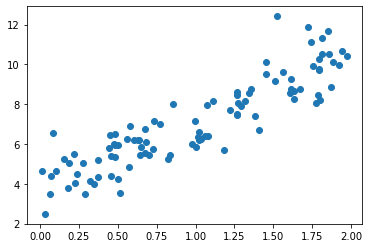

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

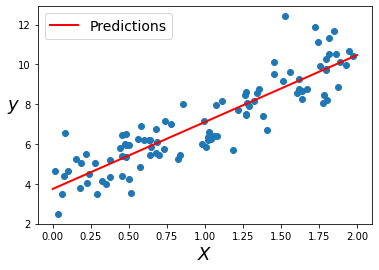

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [12]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

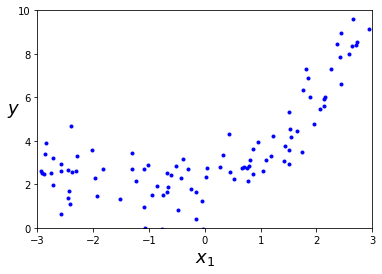

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [14]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [17]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [18]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [19]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

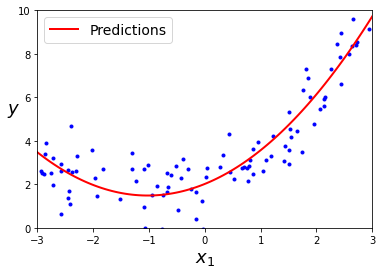

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [21]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [22]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [23]:
len(X)

1000

In [24]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

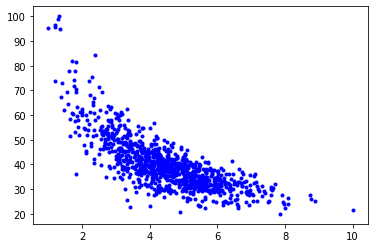

In [25]:
plt.plot(X,y,'b.')

##1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [26]:
#lineal
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

##2. Realiza la Regresión Lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [27]:
#Regresión lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

#Construir linea de ajuste
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente: ", linear_reg.coef_)
print("Intercepción: ", linear_reg.intercept_)

Pendiente:  [-5.98882699]
Intercepción:  66.83650741226988


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


De acuerdo a los resultados obtenemos la siguiente ecuación: 

**Y= -5.98X + 66.83** 

Y graficando nuestro modelo

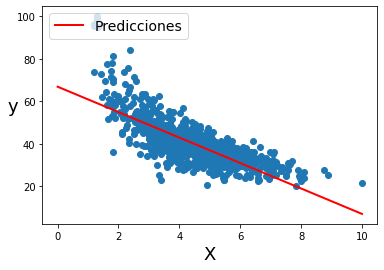

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Ahora vamos a obtener los errores y el Rsquared del modelo

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("-----------Precisión del modelo---------")
print("Entrenamiento:", linear_reg.score(X_train, y_train))
print("Pruebas:", linear_reg.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_fit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_fit))

-----------Precisión del modelo---------
Entrenamiento: 0.5746524649404298
Pruebas: 0.6116251549562579
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 17.04846730203102
Root Mean Squared Error: 21.45395605907538
-----------R squared--------------------
r2_score -2.537148714527668


##3. Realiza la Regresión Polinomial completa: tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

#Instanciamos el modelo polinomial grado 2 y asignamos a X_poly el valor del atributo de X_train y el mismo atributo al cuadrado
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_mipoly = poly_features.fit_transform(X_train)

#Visualizamos el contenido de X_poly
X_mipoly

array([[ 7.97424764, 63.58862541],
       [ 1.89573077,  3.59379517],
       [ 3.5765014 , 12.79136229],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [34]:
#Preparación del modelo 
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_mipoly, y_train)

#Construcción de linea de ajuste
X_fit_pol = np.linspace(0, 10, 100)
y_fit_pol = linear_reg.predict(X_fit_pol[:, np.newaxis])

#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente igual a", lin_reg.coef_)
print("Intercepción igual a", lin_reg.intercept_)

Pendiente igual a [-16.40638102   1.13136095]
Intercepción igual a 88.80179909112496


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


De acuerdo a los resultados obtenemos la siguiente ecuación: 

**Y= 16.40x + 1.31x2 + 88.80** 

Y graficando nuestro modelo

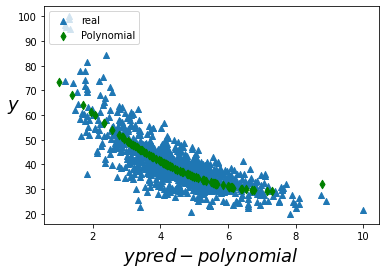

In [35]:
#Realizamos la predicción del modelo
X_new_poly = poly_features.transform(X_test)
X_new_poly_train= poly_features.transform(X_train)
y_new = lin_reg.predict(X_new_poly)

#Para este paso se considera importante organizar los datos.
Orden_X = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[Orden_X]
sortedY = y_test.values[Orden_X]
sorted_pred = y_new[Orden_X]

#Graficamos
plt.scatter(X_train, np.ravel(y_train), marker='^', label='real')  
plt.scatter(sortedX, sorted_pred, marker='d', label='Polynomial', color='g')
plt.xlabel("$ypred-polynomial$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=2)
plt.show()

In [36]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", lin_reg.score(X_new_poly_train, y_train))
print("Pruebas:", lin_reg.score(X_new_poly, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_new))

-----------Precisión del modelo---------
Entrenamiento: 0.6552276217097528
Pruebas: 0.7385501224942536
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425
-----------R squared--------------------
r2_score 0.7385501224942536


##4. Realiza la regresión con Ridge y Lasso: incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

###**4.1 Modelo RIGDE**

In [37]:
from sklearn.linear_model import Lasso, Ridge

#Definimos el modelo ridge
Mod_Ridge = Ridge(alpha=0.1, solver="cholesky")

#Ajustamos el modelo y realizamos la preddición 
Regresion_Ridge = Mod_Ridge.fit(X_train, np.ravel(y_train))
X_fit_ridge = np.linspace(0, 10, 900)
y_pred_ridge = Regresion_Ridge.predict(X_test)
  
#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente igual a", Regresion_Ridge.coef_)
print("Intercepción igual a", Regresion_Ridge.intercept_)

Pendiente igual a [-5.98844997]
Intercepción igual a 66.83482072458477


Obtenemos la siguiente ecuacion:

**Regresión Rigde: -5.98x + 66.83**


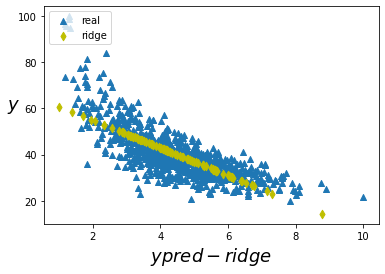

In [39]:
#Organizamos los datos
Orden_X = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[Orden_X]
sortedY = y_test.values[Orden_X]
sorted_pred = y_pred_ridge[Orden_X]
#Graficamos
plt.scatter(X_train, np.ravel(y_train), marker='^', label='real')  
plt.scatter(sortedX, sorted_pred, marker='d', label='ridge', color='y')
plt.xlabel("$ypred-ridge$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=2)
plt.show()

In [40]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", Mod_Ridge.score(X_train, y_train))
print("Pruebas:", Mod_Ridge.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_ridge))

-----------Precisión del modelo---------
Entrenamiento: 0.5746524626629732
Pruebas: 0.6116205486880515
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 5.013640302610032
Root Mean Squared Error: 7.109005479179772
-----------R squared--------------------
r2_score 0.6116205486880515


###**4.2 Modelo LASSO**

In [41]:
#Creamos el modelo LASSO
Mod_Lasso = Lasso(alpha=30)

#Ajustamos el modelo y predecimos
Regresion_Lasso = Mod_Lasso.fit(X_train, np.ravel(y_train))
X_fit_lasso = np.linspace(0, 10, 900)
y_pred_lasso = Regresion_Lasso.predict(X_test)
  
#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente igual a", Regresion_Lasso.coef_)
print("Intercepción igual a", Regresion_Lasso.intercept_)

Pendiente igual a [-0.]
Intercepción igual a 40.044068093688885


Obtenemos la siguiente ecuacion:

**Regresión Rigde: 0x + 40.044**

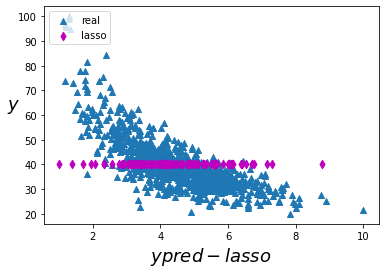

In [42]:
#Organizamos nuestros datos
Orden_X = np.argsort(X_test.values.ravel())
Orden_X_train=np.argsort(X_train.values.ravel())

sortedX = X_test.values.ravel()[Orden_X]
sortedX_train = X_train.values.ravel()[Orden_X_train]
sortedY = y_test.values[Orden_X]
sorted_pred = y_pred_lasso[Orden_X]

#Graficamos
plt.scatter(X_train, np.ravel(y_train), marker='^', label='real')  
plt.scatter(sortedX, sorted_pred, marker='d', label='lasso', color='m')
plt.xlabel("$ypred-lasso$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=2)
plt.show()

In [43]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", Regresion_Lasso.score(X_train, y_train))
print("Pruebas:", Regresion_Lasso.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(sortedY, sorted_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sortedY, sorted_pred)))
print("-----------R squared--------------------")
print('r2_score',r2_score(sortedY, sorted_pred))

-----------Precisión del modelo---------
Entrenamiento: 0.0
Pruebas: -6.130156795136621e-05
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 8.173133499816444
Root Mean Squared Error: 11.407593526938278
-----------R squared--------------------
r2_score -6.130156795158825e-05


**5. Finalmente grafica:**
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

###**5.1 MAE de los cuatro modelos.**

-----Resultados MAE-----
{'REGRESSION': [17.04846730203102], 'POLYNOMIAL': 4.3833025759681075, 'RIDGE': [5.013640302610032], 'LASSO': 8.173133499816442}
---------------------


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


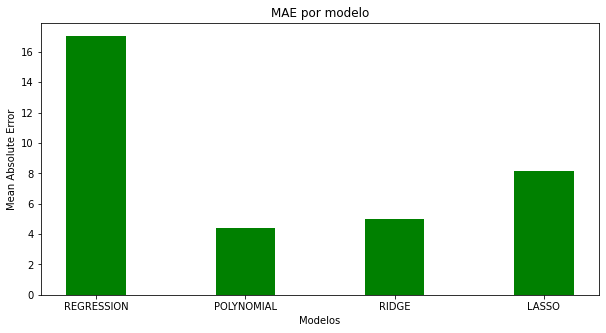

In [48]:
#Creamos un diccionario con los resultados de nuestros modelos
data_MAE = {'REGRESSION': [metrics.mean_absolute_error(y_test, y_fit)], 
        'POLYNOMIAL': metrics.mean_absolute_error(y_test, y_new),
        'RIDGE': [metrics.mean_absolute_error(y_test, y_pred_ridge)],
        'LASSO': metrics.mean_absolute_error(y_test, y_pred_lasso)}


#Obtenemos valores para los ejes
errores_MAE = list(data_MAE.keys())
values_MAE = list(data_MAE.values())
fig = plt.figure(figsize = (10, 5))
 
#Graficamos
plt.bar(errores_MAE, values_MAE, color = 'green', width = 0.4)


print("-----Resultados MAE-----")
print(data_MAE)
print("---------------------")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("Mean Absolute Error")
plt.title("MAE por modelo")
plt.show()

###**5.2 R2 de los cuatro modelos.**

----Resultados R2----
{'REGRESSION': 21.45395605907538, 'POLYNOMIAL': 5.832771301068425, 'RIDGE': 7.109005479179772, 'LASSO': 11.407593526938278}
---------------------


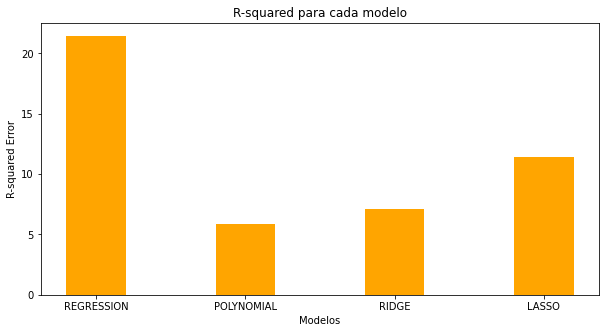

In [50]:
#Creamos un diccionario con los resultados de nuestros modelos
data_R2 = {'REGRESSION': np.sqrt(metrics.mean_squared_error(y_test, y_fit)),
        'POLYNOMIAL': np.sqrt(metrics.mean_squared_error(y_test, y_new)),
        'RIDGE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),
        'LASSO': np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))}


#Obtenemos valores para los ejes
errores_R2 = list(data_R2.keys())
values_R2 = list(data_R2.values())
fig = plt.figure(figsize = (10, 5))
 
#Graficamos
plt.bar(errores_R2, values_R2, color ='orange', width = 0.4)

print("----Resultados R2----")
print(data_R2)
print("---------------------")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("R-squared Error")
plt.title("R-squared para cada modelo")
plt.show()

### **6. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Para el siguiente analisis el modelo polinomial de 2do orden obtuvo un mejor desempeño como lo vemos a continuación:

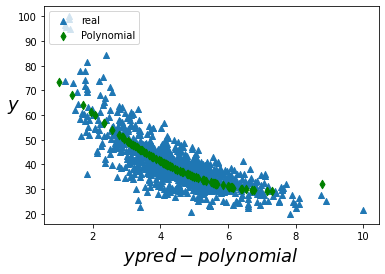

* Si observamos la curva se adapta a los datos y no como en el caso de los otros modelos que obteniamos una linea recta la cual no es acorde a lo que esperamos. 

* En cuanto a las metricas es valioso reconocer el desempeño del modelo con un alto valor tanto en conjunto de entrenamiento como de validación.

* Observamos que nuestro modelo no se sub ni sobre entrena con este orden del polinomio, lo cual nos ahorra capacidad de computo para el momento de su despliegue con mayor cantidad de datos. 

* Para saber si el error que obtuvimos es bueno debemos tener presente que entre mas este se acerque a 0 mejores resultados podemos obtener si hablamos de precisión con nuestras predicciones. 

* Es importante poder tener varios modelos para poder hacer la comparación al momento de tomar la decisición de optar por uno solo, ya que tenemos un panorama general de como se comportan nuestros datos con diferentes alternativas y tendremos para elegir el que mejor se adapte a ellos y menor error obtengamos. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [53]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [54]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


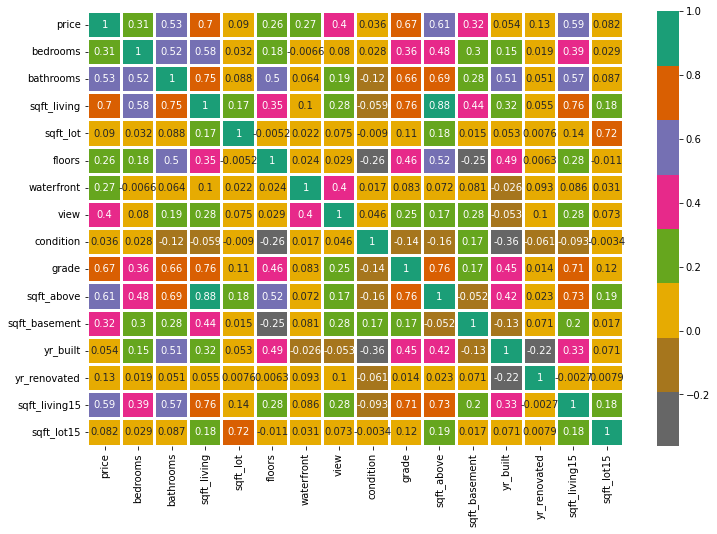

In [55]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [56]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


##**1. Realiza la regresión múltiple lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [58]:
#Creamos nuestra regresión múltiple lineal
linear_reg_mul = LinearRegression(fit_intercept=True)
linear_reg_mul.fit(X_train, y_train)
y_pred_mul=linear_reg_mul.predict(X_test)

#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendientes: ", linear_reg_mul.coef_)
print("Intercepción: ", linear_reg_mul.intercept_)

Pendientes:  [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750272e+01  6.02175566e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Intercepción:  [6151359.26274124]


Obtenemos la siguiente ecuación:

y^ = 6151359.26 + -3.82+e04X₁ + 4.14+e04X₂ + 1.07+e02X₃ + 1.71e-02X₄ + 3.16e+04X₅ + 5.52e+05X₆ + 4.12e+04X₇ + 2.12e+04X₈ + 1.19e+05X₉ + 4.77e+01X₁₀ + 6.02e+01X₁₁ + -3.55e+03X₁₂ + 1.32e+01X₁₃ + 2.90e+01X₁₄ + -5.48e-01X₁₅

Para tener un mejor panorama, vamos a graficarla.

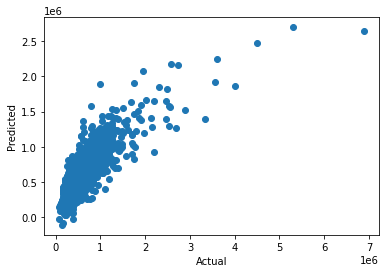

In [59]:
plt.scatter(y_test,y_pred_mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [60]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", linear_reg_mul.score(X_train, y_train))
print("Pruebas:", linear_reg_mul.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_mul))

-----------Precisión del modelo---------
Entrenamiento: 0.6529196653133834
Pruebas: 0.6579723205007892
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 137480.13882733323
Root Mean Squared Error: 232133.3676240722
-----------R squared--------------------
r2_score 0.6579723205007892


###**2. Realiza la regresión múltiple polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [61]:
#Generamos un modelo polinomial de segundo grado
poly_features_mul = PolynomialFeatures(degree=2, include_bias=False)
X_mipoly_mul = poly_features_mul.fit_transform(X_train)
X_mipoly_mul_test = poly_features_mul.fit_transform(X_test)
X_mipoly_mul

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        9.73440000e+06, 2.26356000e+07, 5.26350250e+07],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        6.25000000e+06, 1.20880000e+08, 2.33791590e+09],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        8.76160000e+06, 3.11214400e+07, 1.10544196e+08],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        2.28010000e+06, 1.15137500e+07, 5.81406250e+07],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        2.14036900e+06, 6.32016000e+06, 1.86624000e+07],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        1.08160000e+06, 8.04960000e+06, 5.99076000e+07]])

In [62]:
#Entrenamos el modelo
lin_reg_poly_mul = LinearRegression(fit_intercept=True)
lin_reg_poly_mul.fit(X_mipoly_mul, y_train)

#Se construye la línea de ajuste
y_pred_pol_mul = lin_reg_poly_mul.predict(X_mipoly_mul_test)

#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente igual a", lin_reg_poly_mul.coef_)
print("Intercepción igual a", lin_reg_poly_mul.intercept_)

Pendiente igual a [[ 9.33879687e+05 -1.09273860e+06 -5.37390428e+02 -2.78634102e+01
  -2.07489950e+06 -3.95371495e+06 -2.88652531e+05  5.58519576e+05
   1.09862983e+06 -1.38818478e+02 -3.01577501e+02 -8.59702783e+04
  -2.95366775e+03  3.99963414e+03 -3.40100355e+01  9.57586804e+02
   7.49940820e+03 -1.40076562e+01 -1.85239669e-02  8.58010319e+03
  -1.14952153e+04 -3.08060610e+02 -5.24565914e+03 -5.36863409e+03
  -9.99978948e-01 -1.43956003e+01 -4.67077597e+02 -9.13138297e+00
   1.72800783e+01  2.15615872e-01 -9.63204388e+03  1.52795786e+01
  -1.35647630e-01 -2.59102127e+04  4.33756643e+04  3.82989181e+03
  -1.08068921e+03  2.22968388e+04  1.45391755e+01  1.44644985e+00
   5.03114428e+02 -1.70846902e+01 -1.72874570e+01 -5.60714143e-02
  -4.03248131e+00 -5.41426547e+00  4.83377617e+00  1.60300670e+02
  -1.42705827e+01  1.31213999e+01  2.07436184e+01  5.09311380e+00
   2.80584168e+00  6.59334209e-01 -1.80580810e-01 -9.38519281e-01
   6.96385656e+00  3.06405127e-07  4.40874362e-01 -9.83935

Obtenemos la siguiente ecuación (Aproximada):

y^ = 80227028.31 + 9.33e+05X₁ + -1.09e+06X₂ + -4.56e+02X₃ + -2.78e+01X₄ + -2.07e+06X₅ + -3.95e+06X₆ + -2.88e+05X₇ + ... + 2.35e-06X₁₃₅

Para observarla mejor la graficamos

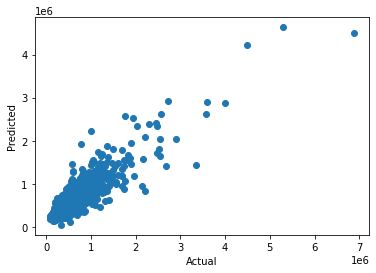

In [64]:
plt.scatter(y_test,y_pred_pol_mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [65]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", lin_reg_poly_mul.score(X_mipoly_mul, y_train))
print("Pruebas:", lin_reg_poly_mul.score(X_mipoly_mul_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_pol_mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol_mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_pol_mul))

-----------Precisión del modelo---------
Entrenamiento: 0.7469519315774406
Pruebas: 0.7797924413783968
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 121313.84710967973
Root Mean Squared Error: 186261.48278206724
-----------R squared--------------------
r2_score 0.7797924413783968


##**3. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

###**3.1 Modelo RIGDE**

In [66]:
#Creamos nuestro modelo ridge
Mod_Ridge_Mul = Ridge(alpha=0.1, solver="cholesky")
Regresion_Ridge_Mul = Mod_Ridge_Mul.fit(X_train, np.ravel(y_train))
y_pred_ridge_mul = Regresion_Ridge_Mul.predict(X_test)
  
#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente igual a", Regresion_Ridge_Mul.coef_)
print("Intercepción igual a", Regresion_Ridge_Mul.intercept_)

Pendiente igual a [-3.82026624e+04  4.14646154e+04  1.07992971e+02  1.71151609e-02
  3.16914389e+04  5.52244513e+05  4.12701376e+04  2.12225788e+04
  1.19490943e+05  4.77799723e+01  6.02182067e+01 -3.55086188e+03
  1.32659578e+01  2.90038360e+01 -5.48119073e-01]
Intercepción igual a 6151298.168406068


Obtenemos la siguiente ecuación:

**y^ = 6151298.16 + -3.82+e04X₁ + 4.14+e04X₂ + 1.07+e02X₃ + 1.71e-02X₄ + 3.16e+04X₅ + 5.52e+05X₆ + 4.12e+04X₇ + 2.12e+04X₈ + 1.19e+05X₉ + 4.77e+01X₁₀ + 6.02e+01X₁₁ + -3.55e+03X₁₂ + 1.32e+01X₁₃ + 2.90e+01X₁₄ + -5.48e-01X₁₅**

Para observarla mejor graficamos

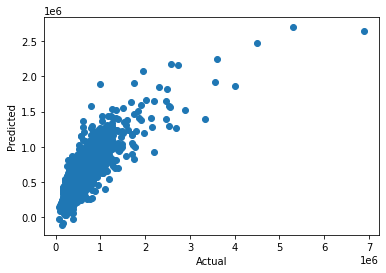

In [67]:
plt.scatter(y_test,y_pred_ridge_mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [68]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", Mod_Ridge_Mul.score(X_train, y_train))
print("Pruebas:", Mod_Ridge_Mul.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge_mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_ridge_mul))

-----------Precisión del modelo---------
Entrenamiento: 0.6529196557498437
Pruebas: 0.6579629179036364
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 137481.23714210742
Root Mean Squared Error: 232136.5583622373
-----------R squared--------------------
r2_score 0.6579629179036364


###**3.2 Modelo LASSO**

In [69]:
#Creamos nuestro modelo lasso
Mod_Lasso_Mul = Lasso(alpha=30)
Regresion_Lasso_Mul = Mod_Lasso_Mul.fit(X_train, np.ravel(y_train))
y_pred_lasso_Mul = Regresion_Lasso_Mul.predict(X_test)
  
#Buscamos la pendiente "a" y el punto de intercepción "b"
print("Pendiente igual a", Regresion_Lasso_Mul.coef_)
print("Intercepción igual a", Regresion_Lasso_Mul.intercept_)

Pendiente igual a [-3.81626952e+04  4.13377006e+04  2.93429446e+02  1.69101741e-02
  3.15551853e+04  5.48193558e+05  4.14186023e+04  2.11395225e+04
  1.19451859e+05 -1.37521709e+02 -1.25162539e+02 -3.54933897e+03
  1.33389557e+01  2.89879703e+01 -5.48236758e-01]
Intercepción igual a 6148984.797520088


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.057e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Obtenemos la siguiente ecuación:

**y^ = 6148984.79 + -3.81+e04X₁ + 4.13+e04X₂ + 2.93+e02X₃ + 1.69e-02X₄ + 3.15e+04X₅ + 5.48e+05X₆ + 4.14e+04X₇ + 2.11e+04X₈ + 1.19e+05X₉ + 1.37e+02X₁₀ + 1.25e+02X₁₁ + -3.54e+03X₁₂ + 1.33e+01X₁₃ + 2.89e+01X₁₄ + -5.48e-01X₁₅**

Para observarla mejor graficamos

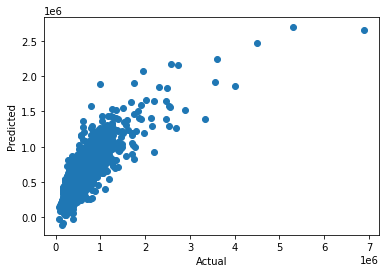

In [70]:
plt.scatter(y_test,y_pred_lasso_Mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [71]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", Regresion_Lasso_Mul.score(X_train, y_train))
print("Pruebas:", Regresion_Lasso_Mul.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso_Mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_Mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_lasso_Mul))

-----------Precisión del modelo---------
Entrenamiento: 0.6529185861760567
Pruebas: 0.6578690543568153
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 137493.1204730804
Root Mean Squared Error: 232168.40822178076
-----------R squared--------------------
r2_score 0.6578690543568153


**4. Finalmente grafica:**
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

###**4.1 MAE**

----Resultados de MAE----
{'REGRESSION_MUL': [137480.13882733323], 'POLYNOMIAL_MUL': 121313.84710967973, 'RIDGE_MUL': [137481.23714210742], 'LASSO_MUL': 137493.1204730804}
-------------------------


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


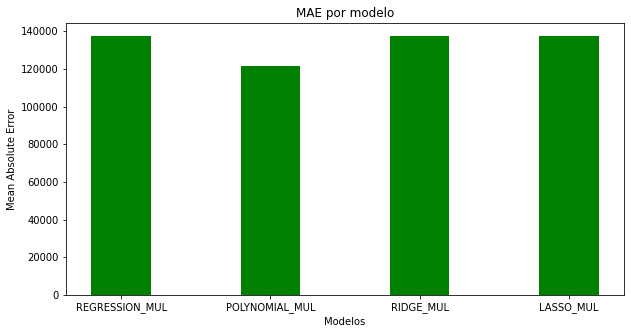

In [73]:
#Creamos un diccionario para almacenar nuestros modelos
data_MAE_Mul = {'REGRESSION_MUL': [metrics.mean_absolute_error(y_test, y_pred_mul)],
        'POLYNOMIAL_MUL': metrics.mean_absolute_error(y_test, y_pred_pol_mul),
        'RIDGE_MUL': [metrics.mean_absolute_error(y_test, y_pred_ridge_mul)],
        'LASSO_MUL': metrics.mean_absolute_error(y_test, y_pred_lasso_Mul)}

#Organizamos nuestros datos
errores_MAE_Mul = list(data_MAE_Mul.keys())
values_MAE_Mul = list(data_MAE_Mul.values())
fig = plt.figure(figsize = (10, 5))
 
#Creamos nuestro grafico
plt.bar(errores_MAE_Mul, values_MAE_Mul, color ='green', width = 0.4)

print("----Resultados de MAE----")
print(data_MAE_Mul)
print("-------------------------")

#Graficamos
plt.xlabel("Modelos")
plt.ylabel("Mean Absolute Error")
plt.title("MAE por modelo")
plt.show()

###**4.2 Rsquared**

----Resultados de R2----
{'REGRESSION_MUL_R2': 232133.3676240722, 'POLYNOMIAL_MUL_R2': 186261.48278206724, 'RIDGE_MUL_R2': 232136.5583622373, 'LASSO_MUL_R2': 232168.40822178076}
------------------------


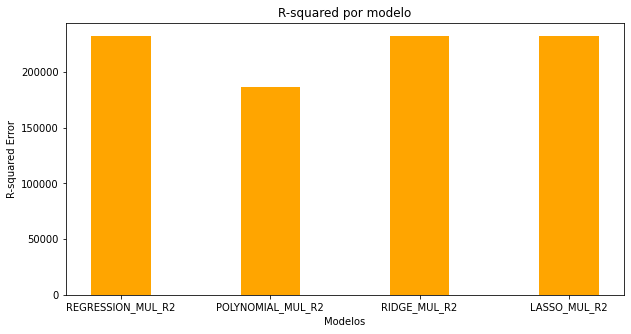

In [74]:
#Creamos un diccionario para almacenar nuestros modelos
data_R2_MUL = {'REGRESSION_MUL_R2': np.sqrt(metrics.mean_squared_error(y_test, y_pred_mul)),
        'POLYNOMIAL_MUL_R2': np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol_mul)),
        'RIDGE_MUL_R2': np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_mul)),
        'LASSO_MUL_R2':np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_Mul))}

#Organizamos nuestros datos
errores_R2_MUL = list(data_R2_MUL.keys())
values_R2_MUL = list(data_R2_MUL.values())
fig = plt.figure(figsize = (10, 5))
 
#Creamos nuestro grafico
plt.bar(errores_R2_MUL, values_R2_MUL, color ='orange', width = 0.4)

print("----Resultados de R2----")
print(data_R2_MUL)
print("------------------------")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("R-squared Error")
plt.title("R-squared por modelo")
plt.show()

##**5. Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Para este caso los resultados son bastante parejos, pero el que más se aproxima es el polinomial de nuevo, debido a que presenta menor valor de error, con unos resultados de Entrenamiento: 0.74 y Pruebas: 0.77, sin estar ni sub ni sobre entrenado, ofreciendo buenas predicciones.

## **6. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

* Este ejercicio es muy similar al anterior y de nuevo podemos observar que el mejor desempeño lo tiene el modelo polinomial, con un buen desempeño respecto los datos de validación y permitiendo su aprendizaje con nuevos datos y generando buenas predicciones al momento de probar con datos de prueba. 

Si quisieramos hablar de los resultados obtenidos en las métricas obtuvimos los siguientes valores:
* MAE: 121314
* Rquared: 186261.2

Esto comparado con los otros modelos es más bajo y por lo tanto es un buen indicador para irnos por este modelo. 



##**7. Agrega las conclusiones**

* Este ejercicio permitio profundizar mucho más respecto a los modelos lineales y polinomiales, brindando una amplia perspectiva de su entrenamiento y comparación con otros modelos y sus respectivos métricas de errores.
* En cuanto a los resultados obtenidos en ambos ejercicios predomino el modelo polinomial sobre Rigde y Lasso, en cuanto a sus errores MAE y R2, y también en su precisión, ya que teniamos la ventaja que nuestros datos podian aproximarse a una curva de grado 2.
* Siempre debemos tener en cuenta antes de irnos por algun modelo primero realizar la comparativa con otros que consideremos puedan arrojarnos resultados similares, y teniendo en cuenta las métricas que utilicemos para medir el desempeño y sus errores, irnos por el que mejor resultado nos ofrezca, garantizando que no caigamos ni en el sub ni sobre entrenamiento. 
* Adicionalmente es importante comenzar a mentalizarnos en como vamos a compartir estos hallazgos con una empresa, utilizando un lenguaje no tan tecnico, sino evidenciando los aspectos positivos de elegir una u otra alternativa, por lo tanto es importante saber explicar nuestros graficos y de manera muy clara que impacto tiene utilizar un modelo vs el otro. 
* Por ultimo y es importante tenerlo en cuenta, a la empresa debemos comunicarle de una manera muy clara que nuestro modelo puede tener cierto porcentaje de error, no es perfecto y debemos empezar a identificar cuando una predicción no puede ser del todo cierta, permitiendonos realizar ajustes si se trata de un intervalo de valores o con ciertos datos en especifico para garantizar que las decisiones sean tomadas apropiadamente.

